In [ ]:
!pip install xgboost


In [ ]:
import pandas as pd
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import plot_importance
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import joblib
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Feature Selection

In [60]:
df = pd.read_csv("/content/drive/MyDrive/FairMOT/MLOPS_DATASET.csv")

KeyboardInterrupt: 

In [ ]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,9495,9496,9497,9498,9499,9500,9501,9502,9503,Label
0,0,0004e68a0c0b4818c4e52d4f414d9dd2,49,0,0,1,0,0,0,6,...,0,0,0,0,0,0.0,0.0,0.0,0.0,FileInfector
1,1,00b4a1d896a0513fc1ffe333e1c313f5,75,0,0,14,6,3,3,23,...,0,0,0,0,0,0.0,0.0,0.0,0.0,FileInfector
2,2,00c525d5599ab0212e15cda186234260,1,0,0,144,1,3,0,17,...,0,0,0,0,0,0.0,0.0,0.0,0.0,FileInfector
3,3,013377a94a52afc0fee128086d341e17,87,1,0,9,1,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,FileInfector
4,4,018ebddf0cbc44f26546f1b14d5bd612,1,0,0,144,1,3,0,17,...,0,0,0,0,0,0.0,0.0,0.0,0.0,FileInfector
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384699,31749,05B54DE933E044A3EEA1685F228801C250F77761098DD2...,521,4,0,126,10,3,6,32,...,0,0,0,0,0,0.0,0.0,0.0,0.0,Benign
384700,31750,05B54F7600FAB04CC94F2FB25A529961C4A787EBF9E40F...,349,0,0,25,7,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,Benign
384701,31751,05B54FFB5CC39AF6134184C920F9802ADE67B95CA53556...,1023,0,0,42,3,2,5,10,...,0,0,0,0,0,0.0,0.0,0.0,0.0,Benign
384702,31752,05B550A50612DA8D01F13D84E00E9A3143A6E76D8F9341...,295,4,0,27,9,0,0,2,...,0,0,0,0,0,0.0,0.0,0.0,0.0,Benign


In [ ]:
df["Label"].unique()

array(['FileInfector', 'Adware', 'Riskware', 'Trojan', 'Zeroday',
       'Backdoor', 'Banker', 'Dropper', 'NoCategory', 'PUA', 'Ransomware',
       'SMS', 'Scareware', 'Spy', 'Benign'], dtype=object)

In [ ]:
df['Label'].value_counts()

Label
Benign          162181
Riskware         97349
Adware           47210
Trojan           27118
Zeroday          26680
Ransomware        6202
Spy               3540
SMS               3125
Dropper           2302
NoCategory        2296
PUA               2051
Scareware         1556
Backdoor          1538
Banker             887
FileInfector       669
Name: count, dtype: int64

In [ ]:
df.drop(["Unnamed: 0","0"],axis=1,inplace= True)

In [ ]:
def map_labels(df):
    unique_labels = df['Label'].unique()
    label_map = {label: idx for idx, label in enumerate(unique_labels)}
    df['Label'] = df['Label'].map(label_map)
    return df

# Call the function with your DataFrame
df = map_labels(df)


In [ ]:
df=df.sample(frac = 1)

In [ ]:
df

,1,2,3,4,5,6,7,8,9,10,...,9495,9496,9497,9498,9499,9500,9501,9502,9503,Label
122640,103,0,0,24,1,2,0,4,1,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,2
37297,1960,0,0,92,98,6,9,29,10,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1
352253,1796,0,0,76,26,8,15,21,4,3,...,0,0,0,0,0,0.0,0.0,0.0,0.0,14
265993,69,0,0,135,7,9,3,6,1,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,14
336715,1138,0,0,64,3,3,4,13,3,1,...,0,0,0,0,0,0.0,0.0,0.0,0.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308253,389,0,0,67,36,1,2,20,1,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,14
30001,116,0,0,5,13,9,6,33,18,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1
315633,37,0,0,16,20,0,0,1,2,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,14
220644,387,0,0,6,5,1,0,10,4,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,4


In [ ]:
df.dropna(inplace = True)

In [ ]:
X = df.drop(["Label"], axis=1)
y = df["Label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = XGBClassifier(n_estimators=50, max_depth=10, learning_rate=0.01)

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8944


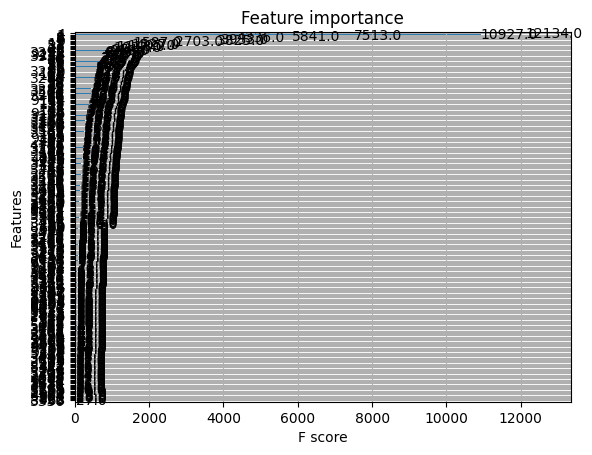

In [ ]:
plot_importance(model,max_num_features=300)
plt.show()

In [ ]:
thresholds = set(sort(model.feature_importances_))
feature_names = X_train.columns


In [ ]:
feature_importances = model.feature_importances_


In [ ]:
feature_importance_dict = dict(zip(X_train.columns, feature_importances))


In [ ]:
top_1000_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:1000]


In [ ]:
top_1000_features

[('3395', 0.28904793),
 ('57', 0.062181924),
 ('5181', 0.0568607),
 ('199', 0.054793198),
 ('4828', 0.040283278),
 ('3284', 0.0365715),
 ('50', 0.03569664),
 ('3396', 0.030300658),
 ('2871', 0.02654628),
 ('324', 0.023854861),
 ('104', 0.02135904),
 ('8384', 0.020918252),
 ('526', 0.018064518),
 ('3462', 0.015696088),
 ('8387', 0.014530874),
 ('159', 0.011548397),
 ('3335', 0.00871539),
 ('3933', 0.008587626),
 ('128', 0.006848833),
 ('6148', 0.006829395),
 ('155', 0.0059868144),
 ('3443', 0.0054235007),
 ('99', 0.005211599),
 ('80', 0.00484702),
 ('6805', 0.0047931843),
 ('3536', 0.004748999),
 ('48', 0.0043367473),
 ('1307', 0.0041426183),
 ('32', 0.004012827),
 ('442', 0.0038978185),
 ('138', 0.0037342797),
 ('979', 0.0037287294),
 ('1604', 0.0036808942),
 ('36', 0.003615006),
 ('263', 0.003089819),
 ('3294', 0.0030767627),
 ('5335', 0.002940909),
 ('3459', 0.0028401725),
 ('8868', 0.0026250016),
 ('8412', 0.002615876),
 ('848', 0.0025777288),
 ('3538', 0.0022598482),
 ('51', 0.0021

In [ ]:
selected_features=[]

In [ ]:
selected_features

{'1',
 '10',
 '100',
 '101',
 '102',
 '1028',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '114',
 '118',
 '119',
 '12',
 '120',
 '122',
 '123',
 '124',
 '1245',
 '1249',
 '125',
 '127',
 '128',
 '129',
 '13',
 '130',
 '1307',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '1373',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '143',
 '1467',
 '147',
 '15',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '159',
 '16',
 '160',
 '1604',
 '161',
 '162',
 '163',
 '164',
 '1645',
 '168',
 '17',
 '178',
 '18',
 '187',
 '189',
 '19',
 '195',
 '199',
 '2',
 '20',
 '204',
 '2079',
 '208',
 '209',
 '21',
 '212',
 '213',
 '217',
 '219',
 '22',
 '224',
 '2246',
 '23',
 '231',
 '233',
 '238',
 '24',
 '240',
 '243',
 '245',
 '248',
 '25',
 '2522',
 '253',
 '2535',
 '2536',
 '2556',
 '258',
 '2597',
 '26',
 '2604',
 '263',
 '2631',
 '2663',
 '2669',
 '2676',
 '268',
 '2688',
 '269',
 '27',
 '272',
 '277',
 '28',
 '281',
 '2816',
 '2835',
 '284',


In [ ]:
for i in top_1000_features:
  if i[1]>0:
    selected_features.append(i[0])

In [ ]:
selected_features=set(selected_features)

In [ ]:
len(selected_features)

450

In [ ]:
new_df = df[list(selected_features)]


In [ ]:
new_df

,1645,3325,71,65,406,305,8409,151,31,2676,...,131,3563,85,526,3295,204,94,35,8,3363
122640,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
37297,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,29,0
352253,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,21,0
265993,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,6,0
336715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,20,0
30001,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,33,0
315633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
220644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,0


In [ ]:
df["Label"]

122640     2
37297      1
352253    14
265993    14
336715    14
          ..
308253    14
30001      1
315633    14
220644     4
292804    14
Name: Label, Length: 384632, dtype: int64

In [ ]:
new_df["Label"]= df["Label"]

<ipython-input-36-50fe1ed55a1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Label"]= df["Label"]


In [ ]:
X = new_df.drop(["Label"], axis=1)
y = new_df["Label"]

In [ ]:
X

,1645,3325,71,65,406,305,8409,151,31,2676,...,131,3563,85,526,3295,204,94,35,8,3363
122640,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
37297,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,29,0
352253,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,21,0
265993,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,6,0
336715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,20,0
30001,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,33,0
315633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
220644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,0


In [ ]:
len(selected_features)

450

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
new_df.to_csv("Final_data_1000.csv")


In [ ]:
f = open("selected_features_1000.txt", "w")
for i in selected_features:
  f.write(i+"\n")
f.close()

# Model Training

## Xgboost Classifier

In [61]:
dataset = pd.read_csv("/content/Final_data_1000.csv")

In [62]:
dataset.drop(["Unnamed: 0"],axis=1,inplace= True)

In [63]:
dataset

,1645,3325,71,65,406,305,8409,151,31,2676,...,3563,85,526,3295,204,94,35,8,3363,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,2
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,29,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,21,0,14
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,6,0,14
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,13,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,20,0,14
384628,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,33,0,1
384629,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,14
384630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,0,4


In [64]:
x = dataset.drop("Label", axis=1)

In [65]:
x

,1645,3325,71,65,406,305,8409,151,31,2676,...,131,3563,85,526,3295,204,94,35,8,3363
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,29,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,21,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,6,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,20,0
384628,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,33,0
384629,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
384630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,0


In [66]:
y = dataset["Label"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [68]:
model = XGBClassifier(n_estimators=50, max_depth=10, learning_rate=0.01)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [69]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8945


In [76]:
with open('xgboost.pkl', 'wb') as file:
    pickle.dump(model, file)

## Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [73]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9296


In [75]:
with open('randomforest.pkl', 'wb') as file:
    pickle.dump(classifier, file)